In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('vehicle_insurance.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.shape

(381109, 12)

In [7]:
df.drop(columns=['id'], inplace=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df.isnull().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


In [9]:
df.duplicated().sum()

np.int64(269)

In [10]:
df.drop_duplicates(df, inplace=True)

In [11]:
df.shape

(380840, 11)

In [12]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [13]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [14]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [15]:
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,0.540747,38.823593,0.997868,26.388307,0.458208,0.609629,0.504876,30584.016078,112.030225,154.344607,0.122584
std,0.498338,15.513206,0.046126,13.229907,0.498251,0.567466,0.499977,17203.258664,54.206194,83.670240,0.327960
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31678.500000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


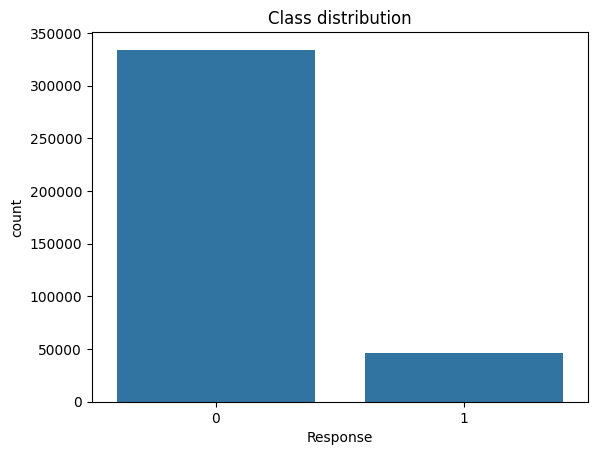

In [16]:
sns.countplot(x='Response', data=df)
plt.title('Class distribution')
plt.xlabel('Response')
plt.ylabel('count')
plt.show()

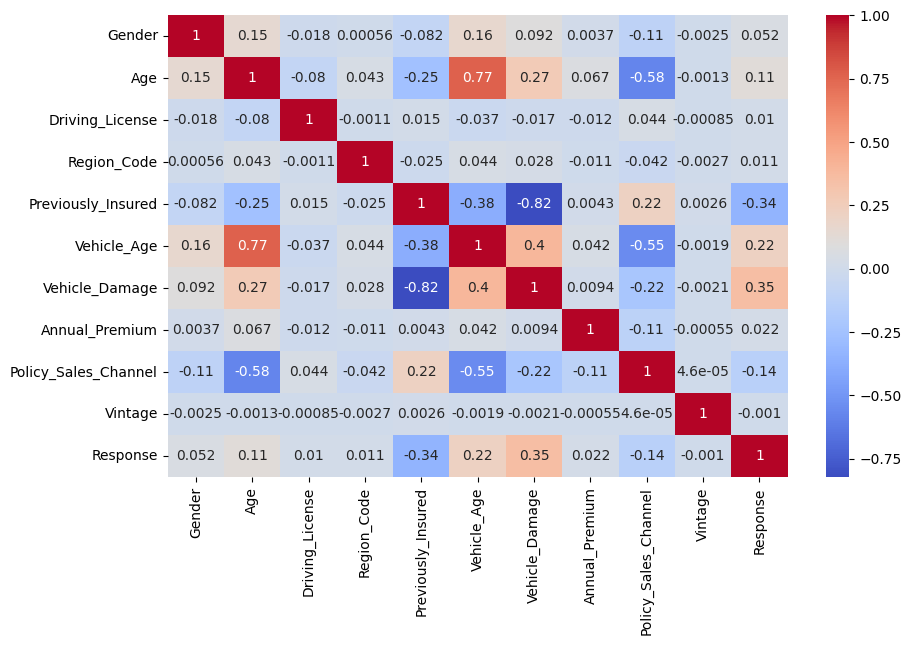

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
df.groupby('Response').mean()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
Response,,,,,,,,,,
0,0.530972,38.179390,0.997693,26.335970,0.521752,0.562577,0.438641,30439.451922,114.846715,154.377008
1,0.610710,43.434572,0.999122,26.762922,0.003384,0.946407,0.978965,31618.756046,91.870772,154.112691


In [19]:
df = df[['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']]
df.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,1,44,0,2,1,26.0,1
1,1,76,0,1,0,26.0,0
2,1,47,0,2,1,26.0,1
3,1,21,1,0,0,152.0,0
4,0,29,1,0,0,152.0,0


In [20]:
df.skew()

,0
Gender,-0.163532
Age,0.672495
Previously_Insured,0.167755
Vehicle_Age,0.253024
Vehicle_Damage,-0.019505
Policy_Sales_Channel,-0.899836
Response,2.301609


In [21]:
X = df.drop(columns=['Response'])
y = df['Response']

In [22]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [23]:
y[y == 1].count()
y[y == 0].count()

np.int64(334155)

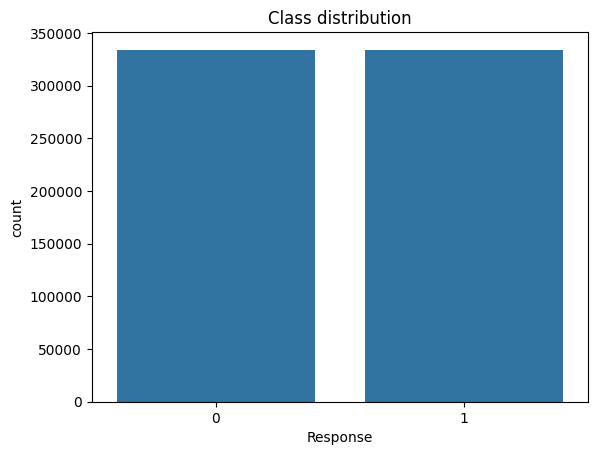

In [24]:
sns.countplot(x=y, data=X)
plt.title('Class distribution')
plt.xlabel('Response')
plt.ylabel('count')
plt.show()

In [25]:
scaler = MinMaxScaler()
X[['Age', 'Policy_Sales_Channel']] = scaler.fit_transform(X[['Age', 'Policy_Sales_Channel']])

In [26]:
X.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,1,0.369231,0,2,1,0.154321
1,1,0.861538,0,1,0,0.154321
2,1,0.415385,0,2,1,0.154321
3,1,0.015385,1,0,0,0.932099
4,0,0.138462,1,0,0,0.932099


In [27]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

In [28]:
bestAcc = 0
bestK = 0
accuracies = []

for i in range(3, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)

    acc = accuracy_score(y_valid, y_pred)
    accuracies.append(acc)

    if acc > bestAcc:
        bestAcc = acc
        bestK = i

accuracies

[0.7675925060008105,
 0.7404407868075689,
 0.776077807911718,
 0.771595124536301,
 0.7891393123227033,
 0.7801490071386266,
 0.7913338944480813,
 0.7864023192742916]

In [29]:
metrics = ['euclidean', 'manhattan', 'minkowski']

bestMetric = ''
bestAcc = 0

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=bestK, metric=metric)
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_valid)

    acc = accuracy_score(y_valid, y_pred)

    print(f'Using Metric: {metric}')
    print(f'Accuracy : {acc}\n')

    if acc > bestAcc:
        bestAcc = acc
        bestMetric = metric

Using Metric: euclidean
Accuracy : 0.7913338944480813

Using Metric: manhattan
Accuracy : 0.7912154368901774

Using Metric: minkowski
Accuracy : 0.7913338944480813



In [30]:
knn = KNeighborsClassifier(n_neighbors=bestK, metric=bestMetric)
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_valid)
print(f'Training Accuracy : {accuracy_score(y_valid, y_train_pred)}')

y_test_pred = knn.predict(X_test)
print(f'Testing Accuracy : {accuracy_score(y_test, y_test_pred)}')

Training Accuracy : 0.7913338944480813
Testing Accuracy : 0.7933818138289117
